In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go 
import pycountry
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [27]:
%matplotlib inline
init_notebook_mode(connected=True)

In [28]:
df=pd.read_csv('dataset//survey_results_public.csv')
df

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.000000
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.000000,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


Text(0.5,1,'Professional graph of Stackoverflow')

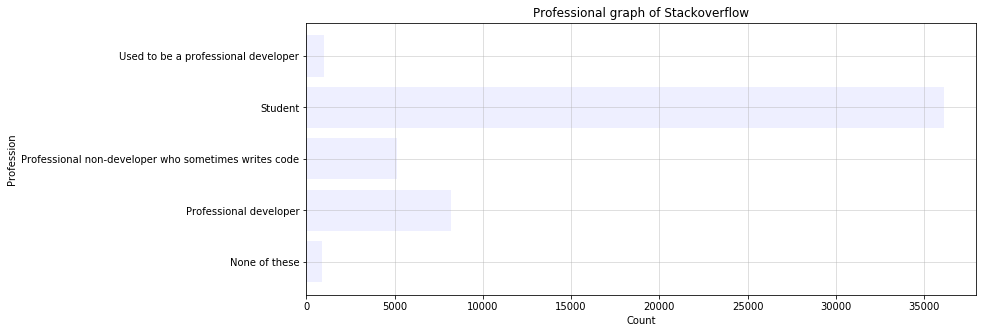

In [30]:
df['Professional'].value_counts()
plt.figure(figsize=(12,5))
plt.barh(df['Professional'].unique(),df['Professional'].value_counts(),color='#eeefff',alpha=1)
plt.grid(True,alpha=0.5)
plt.xlabel('Count')
plt.ylabel('Profession')
plt.title('Professional graph of Stackoverflow')

In [79]:
mapping = {country.name: country.alpha_3 for country in pycountry.countries}
con_d=df['Country'].value_counts()
nam=list(con_d.index.values)
des=list(con_d)
cd=[mapping.get(x) for x in nam]
df1=pd.DataFrame({'Code':cd,'Country':nam,'Density':des})
#df1=df1[~df1['Code'].isnull()]
ldata = [ dict(
        type = 'choropleth',
        locations =df1['Code'] ,
        z =df1['Density'],
        text = df1['Country'],
        colorbar = {'title' : 'Density Scale'},
        )]

layout = dict(
    title = 'Location Density of StackOverflow Members',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = {'type':'Mercator'}
    )
)

choromap = go.Figure(data =ldata,layout = layout)
iplot(choromap)

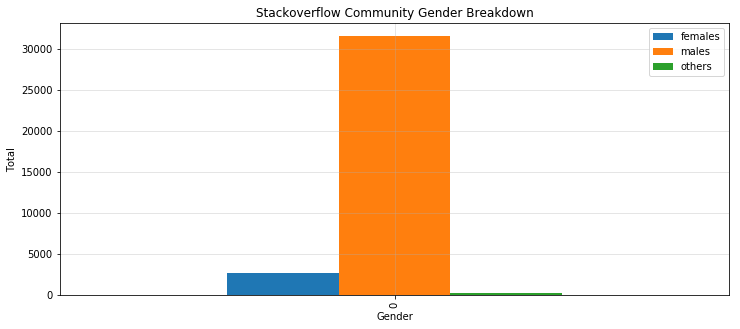

In [113]:
df_se=df['Gender'].value_counts()
no_males=df_se['Male']
no_females=df_se['Female']
no_others=df_se['Other']

df2=pd.DataFrame({'males':[no_males],'females':[no_females],'others':[no_others]})
ax=df2.plot.bar(figsize=(12,5))
ax.set_xlabel('Gender')
ax.set_ylabel('Total')
ax.set_title('Stackoverflow Community Gender Breakdown')
ax.grid(True,alpha=0.4)